<a href="https://colab.research.google.com/github/AyaElshazly/NLP-Data-Science-Applications/blob/main/Toxic%20Wikipedia%20Comments%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install --user pyLDAvis

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


import string
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objects as go
from sklearn.feature_extraction.text import CountVectorizer

import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import (accuracy_score, roc_auc_score, f1_score, hamming_loss,
                             classification_report, multilabel_confusion_matrix)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import ClassifierChain
from sklearn.dummy import DummyClassifier


import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load & Explore Dataset

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/final project dataset /train.csv')

In [ ]:
df

id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                  ...                                                ...   
159566  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
159567  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
159568  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
159569  fff125370e4aaaf3  And it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   

        toxic  severe_toxic  obscene  threat  insult  identity_hate  
0           0             0        0       0       0              0  
1           0             0        0       0       0              0  
2           0             0        0       0       0              0  
3           0             0        0       0       0              0  
4           0             0        0       0       0              0  
...       ...           ...      ...     ...     ...            ...  
159566      0             0        0       0       0              0  
159567      0             0        0       0       0              0  
159568      0             0        0       0       0              0  
159569      0             0        0       0       0              0  
159570      0             0        0       0       0              0  

[159571 rows x 8 columns]

In [ ]:
counts=[]
for i in df['comment_text'] :
  counts.append(len(i))

df['counts']=counts

In [ ]:
df_cleaned=df[df['counts']<400]

In [ ]:
toxic = df_cleaned[df_cleaned['toxic']== 1]

In [ ]:
toxic

id                                       comment_text  \
6       0002bcb3da6cb337       COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK   
12      0005c987bdfc9d4b  Hey... what is it..\n@ | talk .\nWhat is it......   
16      0007e25b2121310b  Bye! \n\nDon't look, come or think of comming ...   
43      00190820581d90ce           FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!   
44      001956c382006abd  I'm Sorry \n\nI'm sorry I screwed around with ...   
...                  ...                                                ...   
159449  fdce660ddcd6d7ca                         I think he is a gay fag!!!   
159493  fef142420a215b90                         FUCKING FAGGOT \n\nLOLWAT.   
159514  ff39a2895fc3b40e                  YOU ARE A MISCHIEVIOUS PUBIC HAIR   
159541  ffa33d3122b599d6  Your absurd edits \n\nYour absurd edits on gre...   
159554  ffbdbb0483ed0841  and i'm going to keep posting the stuff u dele...   

        toxic  severe_toxic  obscene  threat  insult  identity_hate  counts  
6           1             1        1       0       1              0      44  
12          1             0        0       0       0              0     319  
16          1             0        0       0       0              0      57  
43          1             0        1       0       1              0      40  
44          1             0        0       0       0              0     319  
...       ...           ...      ...     ...     ...            ...     ...  
159449      1             0        0       0       0              1      26  
159493      1             0        1       0       1              0      24  
159514      1             0        0       0       1              0      33  
159541      1             0        1       0       1              0     346  
159554      1             0        1       0       1              0     182  

[12866 rows x 9 columns]

In [ ]:
nontoxic = df[df['toxic']== 0][0:len(toxic)]

In [ ]:
df = pd.concat([toxic[0:5000], nontoxic[0:5000]], axis=0)


In [ ]:
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
df

id                                       comment_text  \
0     8c9a7ae5af6e7102  Yes, I took my sword and attacked you by tryin...   
1     079ffebb0377cd20  "\nWOW, ok, I was ment to look at it today but...   
2     0788c252b0f011ee  Colombo Royal College  has made , and Wikipedi...   
3     2b84e392da638590                            He's a ass like I said.   
4     161483d873256623  EVERYONE WANTS TO KILL BILL GOD DAM GATES HE I...   
...                ...                                                ...   
9995  0436905aac62d815                  Stick it right up ur bottom Jock!   
9996  01fa2f1880fecd30  "\nOf course a true Dub will say 'depaaarted' ...   
9997  2a1ed25717ec45eb                   STOP FUCKING WITH THE YTMND WIKI   
9998  0090c1f0788dd0e9  "\nVery well. I see that consensus has formed ...   
9999  0a951a38a3e8ef9d  Well since the Kosovo government was and is st...   

      toxic  severe_toxic  obscene  threat  insult  identity_hate  counts  
0         1             0        0       0       0              0     217  
1         0             0        0       0       0              0     241  
2         0             0        0       0       0              0    1173  
3         1             0        1       0       0              0      23  
4         1             0        0       1       1              0      65  
...     ...           ...      ...     ...     ...            ...     ...  
9995      0             0        0       0       0              0      33  
9996      1             0        0       0       0              0      81  
9997      1             0        1       0       0              0      32  
9998      0             0        0       0       0              0     171  
9999      0             0        0       0       0              0     154  

[10000 rows x 9 columns]

In [ ]:
# List of column names to drop
columns_to_drop = ['id','counts']
#'severe_toxic', 'obscene', 'threat','insult','identity_hate'

# Dropping multiple columns
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   comment_text   10000 non-null  object
 1   toxic          10000 non-null  int64 
 2   severe_toxic   10000 non-null  int64 
 3   obscene        10000 non-null  int64 
 4   threat         10000 non-null  int64 
 5   insult         10000 non-null  int64 
 6   identity_hate  10000 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 547.0+ KB


In [ ]:
df.describe()

toxic  severe_toxic       obscene        threat        insult  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       0.500000      0.051600      0.264300      0.016900      0.247700   
std        0.500025      0.221229      0.440982      0.128903      0.431698   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.500000      0.000000      0.000000      0.000000      0.000000   
75%        1.000000      0.000000      1.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       identity_hate  
count   10000.000000  
mean        0.042200  
std         0.201055  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000

In [ ]:
df

comment_text  toxic  severe_toxic  \
0     Yes, I took my sword and attacked you by tryin...      1             0   
1     "\nWOW, ok, I was ment to look at it today but...      0             0   
2     Colombo Royal College  has made , and Wikipedi...      0             0   
3                               He's a ass like I said.      1             0   
4     EVERYONE WANTS TO KILL BILL GOD DAM GATES HE I...      1             0   
...                                                 ...    ...           ...   
9995                  Stick it right up ur bottom Jock!      0             0   
9996  "\nOf course a true Dub will say 'depaaarted' ...      1             0   
9997                   STOP FUCKING WITH THE YTMND WIKI      1             0   
9998  "\nVery well. I see that consensus has formed ...      0             0   
9999  Well since the Kosovo government was and is st...      0             0   

      obscene  threat  insult  identity_hate  
0           0       0       0              0  
1           0       0       0              0  
2           0       0       0              0  
3           1       0       0              0  
4           0       1       1              0  
...       ...     ...     ...            ...  
9995        0       0       0              0  
9996        0       0       0              0  
9997        1       0       0              0  
9998        0       0       0              0  
9999        0       0       0              0  

[10000 rows x 7 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   comment_text   10000 non-null  object
 1   toxic          10000 non-null  int64 
 2   severe_toxic   10000 non-null  int64 
 3   obscene        10000 non-null  int64 
 4   threat         10000 non-null  int64 
 5   insult         10000 non-null  int64 
 6   identity_hate  10000 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 547.0+ KB


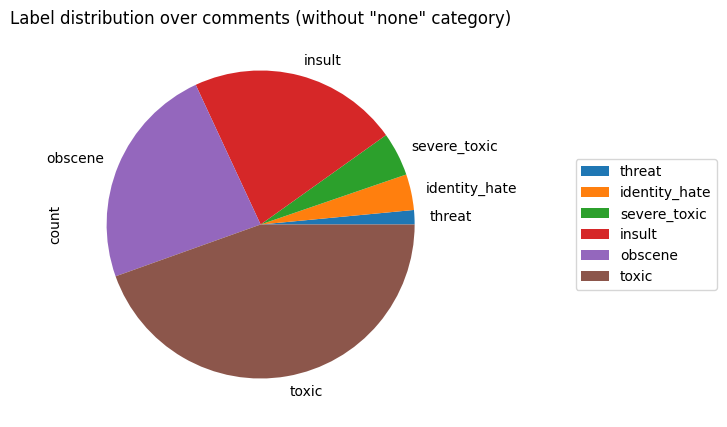

In [ ]:
COLUMNS = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
df_distribution = df[COLUMNS].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y='count',
                                      title='Label distribution over comments (without "none" category)',
                                      figsize=(5, 5))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

<Axes: >

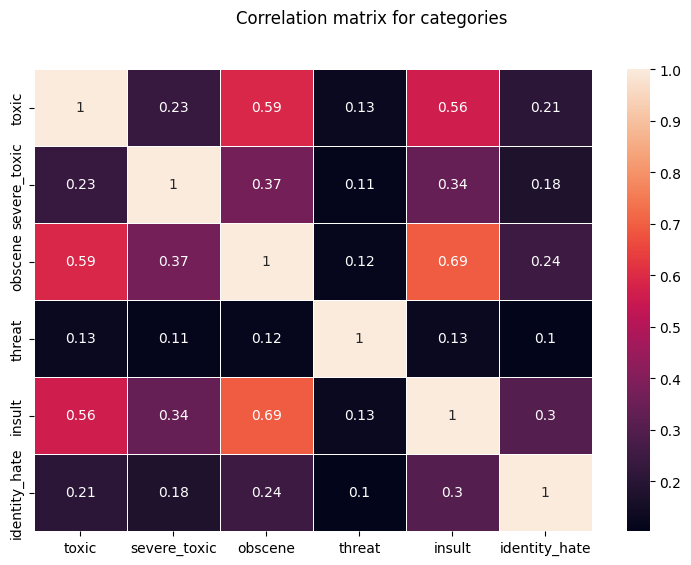

In [ ]:
f, ax = plt.subplots(figsize=(9, 6))
f.suptitle('Correlation matrix for categories')
sns.heatmap(df[COLUMNS].corr(), annot=True, linewidths=.5, ax=ax)

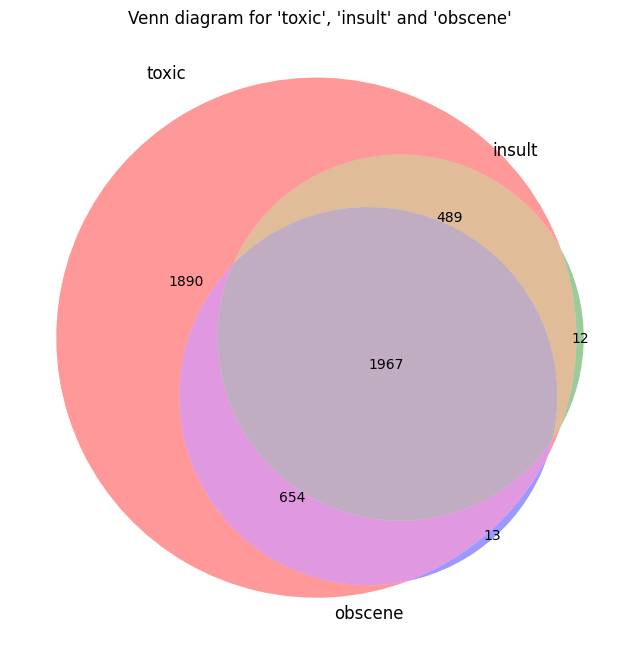

In [ ]:
from matplotlib_venn import venn2
from matplotlib_venn import venn3

t = df[(df['toxic'] == 1) & (df['insult'] == 0) & (df['obscene'] == 0)].shape[0]
i = df[(df['toxic'] == 0) & (df['insult'] == 1) & (df['obscene'] == 0)].shape[0]
o = df[(df['toxic'] == 0) & (df['insult'] == 0) & (df['obscene'] == 1)].shape[0]

t_i = df[(df['toxic'] == 1) & (df['insult'] == 1) & (df['obscene'] == 0)].shape[0]
t_o = df[(df['toxic'] == 1) & (df['insult'] == 0) & (df['obscene'] == 1)].shape[0]
i_o = df[(df['toxic'] == 0) & (df['insult'] == 1) & (df['obscene'] == 1)].shape[0]

t_i_o = df[(df['toxic'] == 1) & (df['insult'] == 1) & (df['obscene'] == 1)].shape[0]


# Make the diagram
plt.figure(figsize=(8, 8))
plt.title("Venn diagram for 'toxic', 'insult' and 'obscene'")
venn3(subsets = (t, i, t_i, o, t_o, i_o, t_i_o),
      set_labels=('toxic', 'insult', 'obscene'))
plt.show()

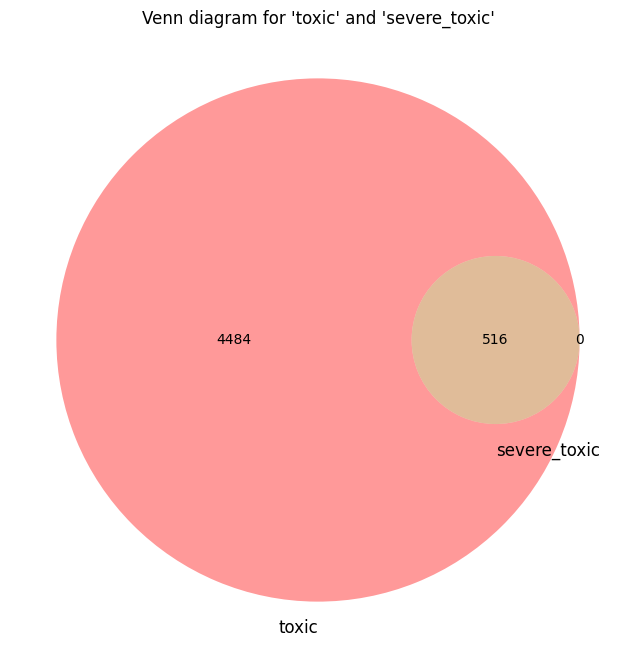

In [ ]:
t = df[(df['toxic'] == 1) & (df['severe_toxic'] == 0)].shape[0]
s = df[(df['toxic'] == 0) & (df['severe_toxic'] == 1)].shape[0]

t_s = df[(df['toxic'] == 1) & (df['severe_toxic'] == 1)].shape[0]


# Make the diagram
plt.figure(figsize=(8, 8))
plt.title("Venn diagram for 'toxic' and 'severe_toxic'")
venn2(subsets = (t, s, t_s),
      set_labels=('toxic', 'severe_toxic'))
plt.show()

## pre-processing

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Clean Text
def clean_text(text):
#replace the html characters with " "
    text=re.sub('<.*?>', ' ', text)  
#remove the punctuations
    text = text.translate(str.maketrans(' ',' ',string.punctuation))
#consider only alphabets and numerics
    text = re.sub('[^a-zA-Z]',' ',text)  
#replace newline with space
    text = re.sub("\n"," ",text)
#convert to lower case
    text = text.lower()
#split and join the words
    text=' '.join(text.split())
    return text

def stopwords(input_text, stop_words):
    word_tokens = word_tokenize(input_text)
    output_text = [w for w in word_tokens if not w in stop_words]
    output = []
    for w in word_tokens:
        if w not in stop_words:
            output.append(w)
            
    text = ' '.join(output)
    return text

unrelevant_words = ['wiki','wikipedia','page']
def clean(data,word):
    #Clean step 1, 2 and 3
    stop_words = set(nltk.corpus.stopwords.words('english'))
    data[word] = data[word].apply(lambda x: ''.join([w for w in clean_text(x) if w not in unrelevant_words]))
    #Clean Step 4
    data[word] = data[word].apply(lambda x: ''.join([w for w in stopwords(x,stop_words)]))
    #Clean Step 5
    data[word] = data[word].apply(lambda x: ''.join([w for w in lemmatizer.lemmatize(x)]))

# Clean Comment Text
clean(df,"comment_text")
df.head()

In [ ]:
def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)

    # Remove web links
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # Remove special characters, punctuation marks, and numbers
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)

    # Insert spaces between certain patterns (e.g., "ie", "eg")
    text = re.sub(r'(\s)([iI][eE]|[eE][gG])(\s)', r' \2 ', text)

    # Remove extra white spaces
    text = " ".join(text.split())

    return text.lower()

In [ ]:
df['Cleaned_Comments'] = df['comment_text'].apply(clean_text)
df['Cleaned_Comments'].head()

0    yes i took my sword and attacked you by trying...
1    wow ok i was ment to look at it today but ive ...
2    colombo royal college has made and wikipedia a...
3                               he s a ass like i said
4    everyone wants to kill bill god dam gates he i...
Name: Cleaned_Comments, dtype: object

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()  # Tokenize the text into words
    filtered_words = [word for word in words if word.lower() not in stop_words]  # Filter out stopwords
    return ' '.join(filtered_words)  # Join the words back into a sentence


In [ ]:
df['Cleaned_Comments'] = df['Cleaned_Comments'].apply(remove_stopwords)
df['Cleaned_Comments'].head()

0    yes took sword attacked trying chop head help ...
1    wow ok ment look today ive sorting loads wikid...
2    colombo royal college made wikipedia administr...
3                                        ass like said
4          everyone wants kill bill god dam gates nerd
Name: Cleaned_Comments, dtype: object

# Spliting Dataset

In [ ]:
X = pd.DataFrame(df['Cleaned_Comments'])


In [ ]:
X

Cleaned_Comments
0     decline niggers jews bad news also cock hard t...
1     pisses go piss butt know heard use fork take d...
2                                         orly fuck n b
3     nm hey every bitch hater mainly kid bitchass r...
4            dope hey rick james leave rick james alone
...                                                 ...
9995  wikipedian idiots live life screen accomplish ...
9996                                               fuck
9997  whoever next person write page admitted aids f...
9998  sorry protest goes unnoticed protest character...
9999                          ur stupid mate block care

[10000 rows x 1 columns]

In [ ]:
df

comment_text  toxic  severe_toxic  \
0     Yes, I took my sword and attacked you by tryin...      1             0   
1     "\nWOW, ok, I was ment to look at it today but...      0             0   
2     Colombo Royal College  has made , and Wikipedi...      0             0   
3                               He's a ass like I said.      1             0   
4     EVERYONE WANTS TO KILL BILL GOD DAM GATES HE I...      1             0   
...                                                 ...    ...           ...   
9995                  Stick it right up ur bottom Jock!      0             0   
9996  "\nOf course a true Dub will say 'depaaarted' ...      1             0   
9997                   STOP FUCKING WITH THE YTMND WIKI      1             0   
9998  "\nVery well. I see that consensus has formed ...      0             0   
9999  Well since the Kosovo government was and is st...      0             0   

      obscene  threat  insult  identity_hate  \
0           0       0       0              0   
1           0       0       0              0   
2           0       0       0              0   
3           1       0       0              0   
4           0       1       1              0   
...       ...     ...     ...            ...   
9995        0       0       0              0   
9996        0       0       0              0   
9997        1       0       0              0   
9998        0       0       0              0   
9999        0       0       0              0   

                                       Cleaned_Comments  
0     yes took sword attacked trying chop head help ...  
1     wow ok ment look today ive sorting loads wikid...  
2     colombo royal college made wikipedia administr...  
3                                         ass like said  
4           everyone wants kill bill god dam gates nerd  
...                                                 ...  
9995                         stick right ur bottom jock  
9996       course true dub say depaaarted likely f gone  
9997                            stop fucking ytmnd wiki  
9998  well see consensus formed show indeed pov bad ...  
9999  well since kosovo government still primitive s...  

[10000 rows x 8 columns]

In [ ]:

# Target variables
Y = df.drop(['comment_text','Cleaned_Comments'],axis=1)


In [ ]:
Y

toxic  severe_toxic  obscene  threat  insult  identity_hate
0         1             1        1       0       1              1
1         1             0        1       0       0              0
2         1             1        1       0       1              0
3         1             0        1       0       1              0
4         1             0        0       0       0              0
...     ...           ...      ...     ...     ...            ...
9995      1             0        0       0       1              0
9996      1             0        1       0       0              0
9997      1             0        0       0       0              0
9998      0             0        0       0       0              0
9999      1             0        1       0       1              0

[10000 rows x 6 columns]

# split

In [ ]:
# X_first, x_second, y_first, y_seconnd = train_test_split(
#     X, Y, test_size=0.50, random_state=42,stratify=Y)
# Train_texts, Test_texts, Train_labels, Test_labels = train_test_split(
#     X_first, y_first, test_size=0.30, random_state=42,stratify=y_first)

# #validation set
# test_texts, val_texts, test_labels, val_labels = train_test_split(
#     Test_texts, Test_labels, test_size=0.3, random_state=42,stratify=Test_labels)
# print('Dataset for Baseline -->',len(x_second), x_second.shape)
# print('Training Dataset -->',len(Train_texts), Train_labels.shape)
# print('Testing Dataset -->',len(test_texts), test_labels.shape)
# print('Validation Dataset -->',len(val_texts), val_labels.shape)

Dataset for Baseline --> 5000 (5000,)
Training Dataset --> 3500 (3500, 6)
Testing Dataset --> 1050 (1050, 6)
Validation Dataset --> 450 (450, 6)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
X_train

Cleaned_Comments
9069  football aid april thank participating footbal...
2603              nicolae carpathia naturally apologies
7738    fuck smith please notified die want dance grave
1579  worry saw telly years ago saying going kill mo...
5058                       suggest strike comments talk
...                                                 ...
5734                        turks wild subhumans animal
5191  review ga review see wp wiaga criteria reasona...
5390  good luck wikipedia sucks oooh look awards cer...
860   information sir feminism merely belief women e...
7270  flagged page reading like advertisement jonath...

[7000 rows x 1 columns]

In [ ]:
y_train

toxic  severe_toxic  obscene  threat  insult  identity_hate
9069      0             0        0       0       0              0
2603      0             0        0       0       0              0
7738      1             1        1       0       1              0
1579      1             0        1       0       1              0
5058      0             0        0       0       0              0
...     ...           ...      ...     ...     ...            ...
5734      1             0        0       0       1              1
5191      0             0        0       0       0              0
5390      1             0        1       0       1              0
860       0             0        0       0       0              0
7270      0             0        0       0       0              0

[7000 rows x 6 columns]

In [ ]:
df['toxic'].value_counts()

toxic
1    5000
0    5000
Name: count, dtype: int64

In [ ]:
# Function to generate word cloud
def generate_wordcloud(text,Title):
    wordcloud = WordCloud(width=800, height=400,stopwords=set(STOPWORDS), background_color='black').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(Title)
    plt.show()

In [ ]:
target_labels= [col for col in df.columns if df[col].dtypes == 'int64']
target_labels

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

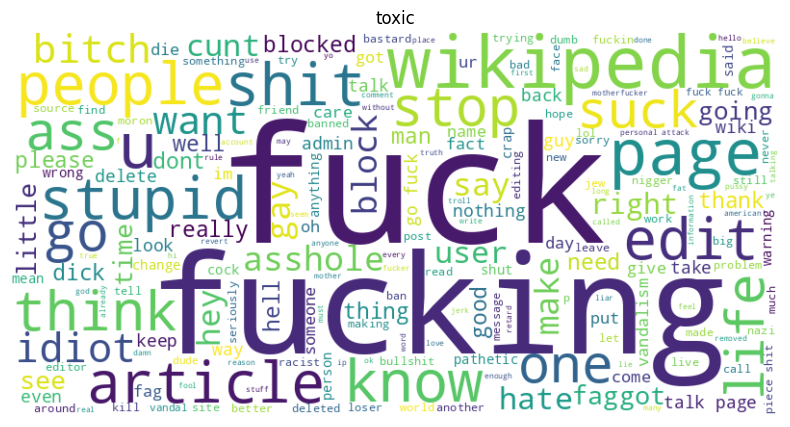

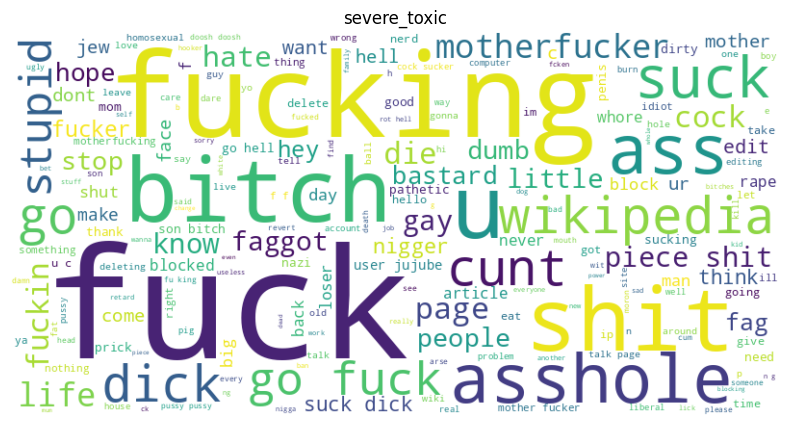

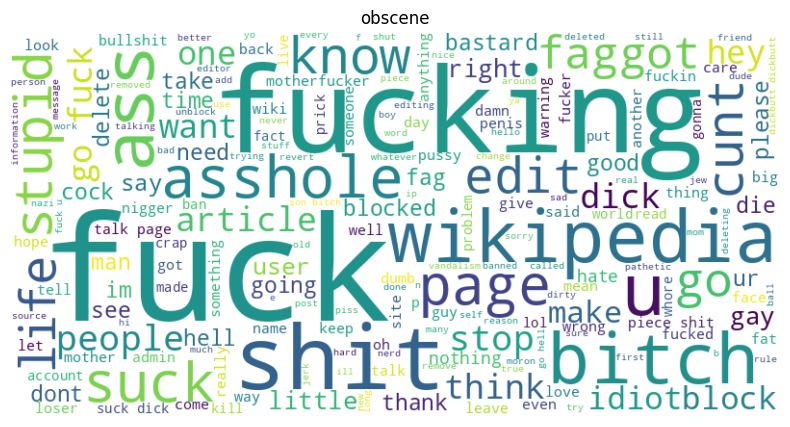

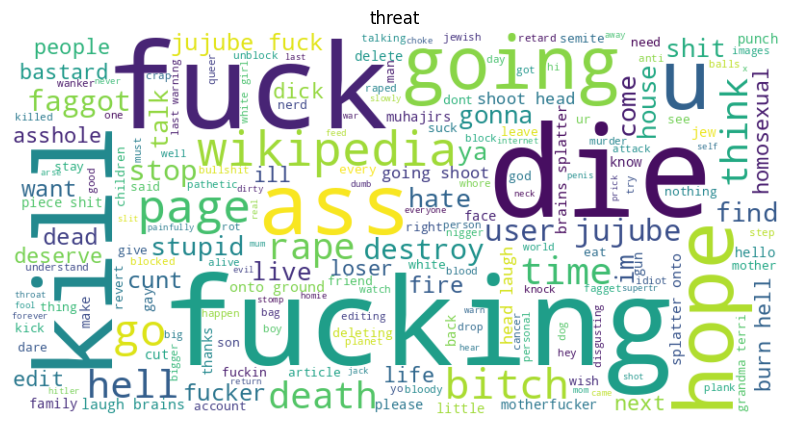

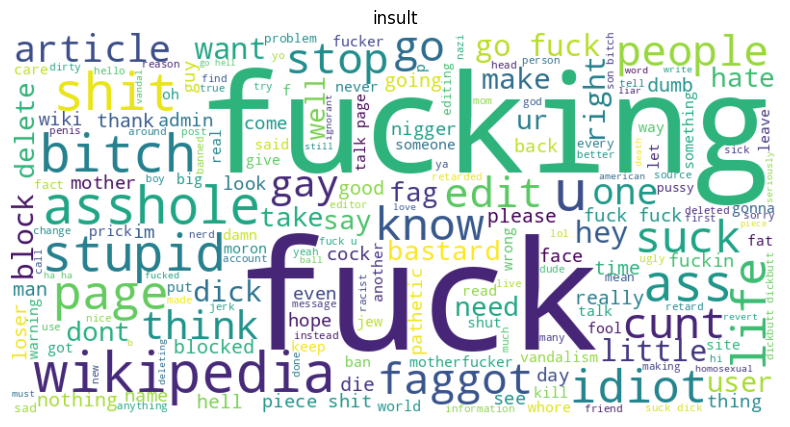

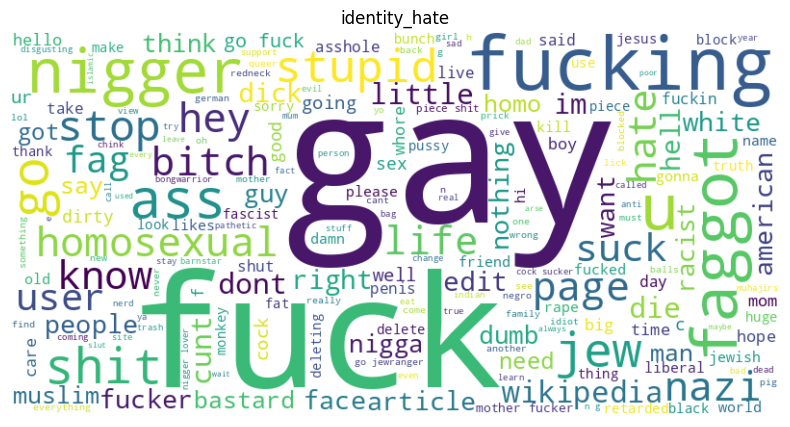

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Function to generate word cloud
def generate_wordcloud(text, Title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(Title)
    plt.axis('off')
    plt.show()

# Assuming 'target_labels' and 'df' are defined properly

# Plot word clouds for each target label
for label in target_labels:
    text = ' '.join(df[df[label] == 1]['Cleaned_Comments'].values)
    generate_wordcloud(text, Title=label)

In [ ]:
comments=df['Cleaned_Comments'].to_list()
comments[:5]

['yes took sword attacked trying chop head help hydra one head two new appear one step forward two steps behind thanks message',
 'wow ok ment look today ive sorting loads wikidrama havent time worry least two weeks review comes around plenty time go sharp edges bad',
 'colombo royal college made wikipedia administrators bunch puppets crappy rules dancing decent tune tactics cunnig fox vision one royal sri lanka long wikipedia alive reality sing posts tune eleminate crush legal schools sri lanka name royal record clear alive royal way administrators enjoy smell royal fart dance tune colombo royal college royal dust bin smelly come keep farting wide royal jackal cossde royal way smell pres tig iously owesome harassed sri lankan royalists reid avenue turned battlefield royal principal summons parents meeting classes upper school students royal thurstan royal thurstan students clash policeman injured royal college panadura battle greens royal college wayamba kurunegala battle wayamba roya

In [ ]:
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objects as go
############################################################################################################

# Calculate the value counts for each target label
value_counts = df[target_labels].sum()

# Add the count for the "neither" category (where all target labels are 0)
value_counts['Good Comments'] =   value_counts.sum()-len(df)

fig = px.bar(x=value_counts.index,
             y=value_counts.values,
             color=value_counts.index,
             color_discrete_sequence=px.colors.qualitative.Dark24_r)

fig.update_layout(title='<b>Counts of Target Labels',
                  xaxis_title='Toxicity Labels',
                  yaxis_title='Counts',
                  template='plotly',
                  width=1000,   # Adjust the width here (sm50aller value)
                  height=600)  # Adjust the height here (smaller value)

# Show the bar chart
fig.show()

In [ ]:
df

comment_text  toxic  severe_toxic  \
0     Yes, I took my sword and attacked you by tryin...      1             0   
1     "\nWOW, ok, I was ment to look at it today but...      0             0   
2     Colombo Royal College  has made , and Wikipedi...      0             0   
3                               He's a ass like I said.      1             0   
4     EVERYONE WANTS TO KILL BILL GOD DAM GATES HE I...      1             0   
...                                                 ...    ...           ...   
9995                  Stick it right up ur bottom Jock!      0             0   
9996  "\nOf course a true Dub will say 'depaaarted' ...      1             0   
9997                   STOP FUCKING WITH THE YTMND WIKI      1             0   
9998  "\nVery well. I see that consensus has formed ...      0             0   
9999  Well since the Kosovo government was and is st...      0             0   

      obscene  threat  insult  identity_hate  \
0           0       0       0              0   
1           0       0       0              0   
2           0       0       0              0   
3           1       0       0              0   
4           0       1       1              0   
...       ...     ...     ...            ...   
9995        0       0       0              0   
9996        0       0       0              0   
9997        1       0       0              0   
9998        0       0       0              0   
9999        0       0       0              0   

                                       Cleaned_Comments  
0     yes took sword attacked trying chop head help ...  
1     wow ok ment look today ive sorting loads wikid...  
2     colombo royal college made wikipedia administr...  
3                                         ass like said  
4           everyone wants kill bill god dam gates nerd  
...                                                 ...  
9995                         stick right ur bottom jock  
9996       course true dub say depaaarted likely f gone  
9997                            stop fucking ytmnd wiki  
9998  well see consensus formed show indeed pov bad ...  
9999  well since kosovo government still primitive s...  

[10000 rows x 8 columns]

In [ ]:
df_cleaned=df.drop('comment_text', axis=1)

In [ ]:
df_cleaned.shape

(10000, 7)

In [ ]:
df_cleaned.head()

toxic  severe_toxic  obscene  threat  insult  identity_hate  \
0      1             0        0       0       0              0   
1      0             0        0       0       0              0   
2      0             0        0       0       0              0   
3      1             0        1       0       0              0   
4      1             0        0       1       1              0   

                                    Cleaned_Comments  
0  yes took sword attacked trying chop head help ...  
1  wow ok ment look today ive sorting loads wikid...  
2  colombo royal college made wikipedia administr...  
3                                      ass like said  
4        everyone wants kill bill god dam gates nerd

In [ ]:
df_cleaned.rename(columns={'Cleaned_Comments': 'comments'}, inplace=True)

In [ ]:
df_cleaned

toxic  severe_toxic  obscene  threat  insult  identity_hate  \
0         1             0        0       0       0              0   
1         0             0        0       0       0              0   
2         0             0        0       0       0              0   
3         1             0        1       0       0              0   
4         1             0        0       1       1              0   
...     ...           ...      ...     ...     ...            ...   
9995      0             0        0       0       0              0   
9996      1             0        0       0       0              0   
9997      1             0        1       0       0              0   
9998      0             0        0       0       0              0   
9999      0             0        0       0       0              0   

                                               comments  
0     yes took sword attacked trying chop head help ...  
1     wow ok ment look today ive sorting loads wikid...  
2     colombo royal college made wikipedia administr...  
3                                         ass like said  
4           everyone wants kill bill god dam gates nerd  
...                                                 ...  
9995                         stick right ur bottom jock  
9996       course true dub say depaaarted likely f gone  
9997                            stop fucking ytmnd wiki  
9998  well see consensus formed show indeed pov bad ...  
9999  well since kosovo government still primitive s...  

[10000 rows x 7 columns]

In [ ]:
X

Cleaned_Comments
0     yes took sword attacked trying chop head help ...
1     wow ok ment look today ive sorting loads wikid...
2     colombo royal college made wikipedia administr...
3                                         ass like said
4           everyone wants kill bill god dam gates nerd
...                                                 ...
9995                         stick right ur bottom jock
9996       course true dub say depaaarted likely f gone
9997                            stop fucking ytmnd wiki
9998  well see consensus formed show indeed pov bad ...
9999  well since kosovo government still primitive s...

[10000 rows x 1 columns]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
#pd.DataFrame(df_cleaned)

In [ ]:
# # Initialize the CountVectorizer
# vectorizer = CountVectorizer()


# # Fit and transform the text data
# bow_matrix = vectorizer.fit_transform(df['Cleaned_Comments'])

# # Convert the result into a DataFrame
# bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# # Combine with the original DataFrame
# df_bow = pd.concat([df['toxic'], bow_df], axis=1)


In [ ]:

# # transform the data to a BOW
# # if you get error in CountVectorizer' object has no attribute 'get_feature_names' ues the line with get_feature_names_out
# vect = CountVectorizer()
# X_BOW = vect.fit_transform(df['Cleaned_Comments'])
# count_array = X_BOW.toarray()
# df_BOW = pd.DataFrame(count_array,columns = vect.get_feature_names_out())
# df_BOW

In [ ]:
######################

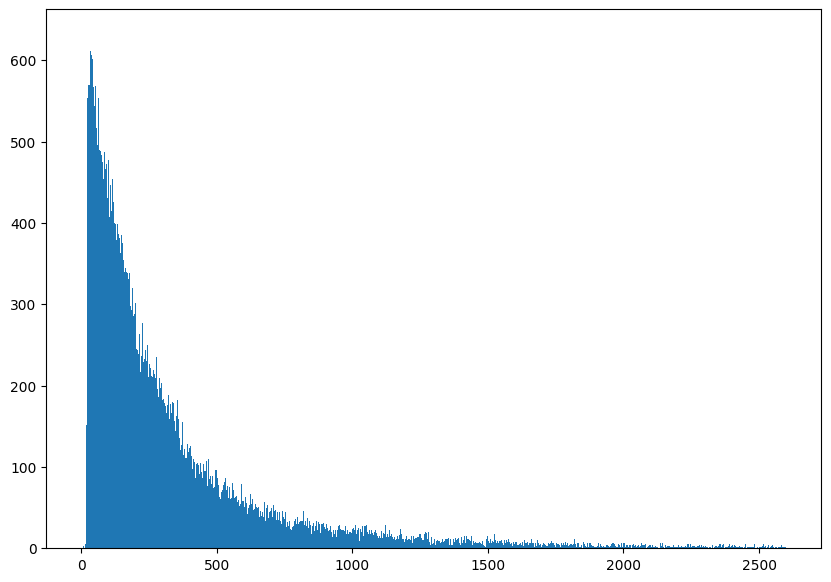

In [ ]:

from matplotlib import pyplot as plt
import numpy as np


# Creating dataset
a = np.array(counts)

# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(a, bins = range(0,2600))

# Show plot
plt.show()

In [ ]:
X_train

Cleaned_Comments
9069  football aid april thank participating footbal...
2603              nicolae carpathia naturally apologies
7738    fuck smith please notified die want dance grave
1579  worry saw telly years ago saying going kill mo...
5058                       suggest strike comments talk
...                                                 ...
5734                        turks wild subhumans animal
5191  review ga review see wp wiaga criteria reasona...
5390  good luck wikipedia sucks oooh look awards cer...
860   information sir feminism merely belief women e...
7270  flagged page reading like advertisement jonath...

[7000 rows x 1 columns]

In [ ]:
y_train

toxic  severe_toxic  obscene  threat  insult  identity_hate
9069      0             0        0       0       0              0
2603      0             0        0       0       0              0
7738      1             1        1       0       1              0
1579      1             0        1       0       1              0
5058      0             0        0       0       0              0
...     ...           ...      ...     ...     ...            ...
5734      1             0        0       0       1              1
5191      0             0        0       0       0              0
5390      1             0        1       0       1              0
860       0             0        0       0       0              0
7270      0             0        0       0       0              0

[7000 rows x 6 columns]

In [ ]:
X

Cleaned_Comments
0     yes took sword attacked trying chop head help ...
1     wow ok ment look today ive sorting loads wikid...
2     colombo royal college made wikipedia administr...
3                                         ass like said
4           everyone wants kill bill god dam gates nerd
...                                                 ...
9995                         stick right ur bottom jock
9996       course true dub say depaaarted likely f gone
9997                            stop fucking ytmnd wiki
9998  well see consensus formed show indeed pov bad ...
9999  well since kosovo government still primitive s...

[10000 rows x 1 columns]

# BOW

In [ ]:
X_train['Cleaned_Comments']

9069    football aid april thank participating footbal...
2603                nicolae carpathia naturally apologies
7738      fuck smith please notified die want dance grave
1579    worry saw telly years ago saying going kill mo...
5058                         suggest strike comments talk
                              ...                        
5734                          turks wild subhumans animal
5191    review ga review see wp wiaga criteria reasona...
5390    good luck wikipedia sucks oooh look awards cer...
860     information sir feminism merely belief women e...
7270    flagged page reading like advertisement jonath...
Name: Cleaned_Comments, Length: 7000, dtype: object

In [ ]:
# transform the data to a BOW
# if you get error in CountVectorizer' object has no attribute 'get_feature_names' ues the line with get_feature_names_out
vect = CountVectorizer()
X_BOW = vect.fit_transform(X_train['Cleaned_Comments'])
count_array = X_BOW.toarray()
df_comment_BOW = pd.DataFrame(count_array,columns = vect.get_feature_names_out())


X_BOW_test = vect.fit_transform(X_test['Cleaned_Comments'])

count_array_test = X_BOW_test.toarray()


df_comment_BOW_test = pd.DataFrame(count_array_test,columns = vect.get_feature_names_out())


In [ ]:
X_train

Cleaned_Comments
9069  football aid april thank participating footbal...
2603              nicolae carpathia naturally apologies
7738    fuck smith please notified die want dance grave
1579  worry saw telly years ago saying going kill mo...
5058                       suggest strike comments talk
...                                                 ...
5734                        turks wild subhumans animal
5191  review ga review see wp wiaga criteria reasona...
5390  good luck wikipedia sucks oooh look awards cer...
860   information sir feminism merely belief women e...
7270  flagged page reading like advertisement jonath...

[7000 rows x 1 columns]

In [ ]:
X

Cleaned_Comments
0     yes took sword attacked trying chop head help ...
1     wow ok ment look today ive sorting loads wikid...
2     colombo royal college made wikipedia administr...
3                                         ass like said
4           everyone wants kill bill god dam gates nerd
...                                                 ...
9995                         stick right ur bottom jock
9996       course true dub say depaaarted likely f gone
9997                            stop fucking ytmnd wiki
9998  well see consensus formed show indeed pov bad ...
9999  well since kosovo government still primitive s...

[10000 rows x 1 columns]

In [ ]:
word_vectorizer = TfidfVectorizer(max_features=10000)
word_vectorizer.fit(X['Cleaned_Comments'])
train_word_features = word_vectorizer.transform(X_train['Cleaned_Comments'])
df_comment_tf_idf_train = pd.DataFrame(train_word_features.toarray(),columns=word_vectorizer.get_feature_names_out())
test_word_features = word_vectorizer.transform(X_test['Cleaned_Comments'])
df_comment_tf_idf_test= pd.DataFrame(test_word_features.toarray(),columns=word_vectorizer.get_feature_names_out())
df_comment_tf_idf_train

aa  aaron  abbey  abc  abcmonster  abd  abide  abilities  ability  \
0     0.0    0.0    0.0  0.0         0.0  0.0    0.0        0.0      0.0   
1     0.0    0.0    0.0  0.0         0.0  0.0    0.0        0.0      0.0   
2     0.0    0.0    0.0  0.0         0.0  0.0    0.0        0.0      0.0   
3     0.0    0.0    0.0  0.0         0.0  0.0    0.0        0.0      0.0   
4     0.0    0.0    0.0  0.0         0.0  0.0    0.0        0.0      0.0   
...   ...    ...    ...  ...         ...  ...    ...        ...      ...   
6995  0.0    0.0    0.0  0.0         0.0  0.0    0.0        0.0      0.0   
6996  0.0    0.0    0.0  0.0         0.0  0.0    0.0        0.0      0.0   
6997  0.0    0.0    0.0  0.0         0.0  0.0    0.0        0.0      0.0   
6998  0.0    0.0    0.0  0.0         0.0  0.0    0.0        0.0      0.0   
6999  0.0    0.0    0.0  0.0         0.0  0.0    0.0        0.0      0.0   

      able  ...  zionism  zionist  zionists  zis  zod  zoey  zone  zones   zu  \
0      0.0  ...      0.0      0.0       0.0  0.0  0.0   0.0   0.0    0.0  0.0   
1      0.0  ...      0.0      0.0       0.0  0.0  0.0   0.0   0.0    0.0  0.0   
2      0.0  ...      0.0      0.0       0.0  0.0  0.0   0.0   0.0    0.0  0.0   
3      0.0  ...      0.0      0.0       0.0  0.0  0.0   0.0   0.0    0.0  0.0   
4      0.0  ...      0.0      0.0       0.0  0.0  0.0   0.0   0.0    0.0  0.0   
...    ...  ...      ...      ...       ...  ...  ...   ...   ...    ...  ...   
6995   0.0  ...      0.0      0.0       0.0  0.0  0.0   0.0   0.0    0.0  0.0   
6996   0.0  ...      0.0      0.0       0.0  0.0  0.0   0.0   0.0    0.0  0.0   
6997   0.0  ...      0.0      0.0       0.0  0.0  0.0   0.0   0.0    0.0  0.0   
6998   0.0  ...      0.0      0.0       0.0  0.0  0.0   0.0   0.0    0.0  0.0   
6999   0.0  ...      0.0      0.0       0.0  0.0  0.0   0.0   0.0    0.0  0.0   

      zuck  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0  
...    ...  
6995   0.0  
6996   0.0  
6997   0.0  
6998   0.0  
6999   0.0  

[7000 rows x 10000 columns]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack

In [ ]:
class_names = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [ ]:
print(df_comment_tf_idf_train)

       aa  aaron  abbey  abc  abcmonster  abd  abide  abilities  ability  \
0     0.0    0.0    0.0  0.0         0.0  0.0    0.0        0.0      0.0   
1     0.0    0.0    0.0  0.0         0.0  0.0    0.0        0.0      0.0   
2     0.0    0.0    0.0  0.0         0.0  0.0    0.0        0.0      0.0   
3     0.0    0.0    0.0  0.0         0.0  0.0    0.0        0.0      0.0   
4     0.0    0.0    0.0  0.0         0.0  0.0    0.0        0.0      0.0   
...   ...    ...    ...  ...         ...  ...    ...        ...      ...   
6995  0.0    0.0    0.0  0.0         0.0  0.0    0.0        0.0      0.0   
6996  0.0    0.0    0.0  0.0         0.0  0.0    0.0        0.0      0.0   
6997  0.0    0.0    0.0  0.0         0.0  0.0    0.0        0.0      0.0   
6998  0.0    0.0    0.0  0.0         0.0  0.0    0.0        0.0      0.0   
6999  0.0    0.0    0.0  0.0         0.0  0.0    0.0        0.0      0.0   

      able  ...  zionism  zionist  zionists  zis  zod  zoey  zone  zones   zu  \
0     

In [ ]:
df_comment_tf_idf_test

aa  aaron  abbey  abc  abcmonster  abd  abide  abilities  ability  \
0     0.0    0.0    0.0  0.0         0.0  0.0    0.0        0.0      0.0   
1     0.0    0.0    0.0  0.0         0.0  0.0    0.0        0.0      0.0   
2     0.0    0.0    0.0  0.0         0.0  0.0    0.0        0.0      0.0   
3     0.0    0.0    0.0  0.0         0.0  0.0    0.0        0.0      0.0   
4     0.0    0.0    0.0  0.0         0.0  0.0    0.0        0.0      0.0   
...   ...    ...    ...  ...         ...  ...    ...        ...      ...   
2995  0.0    0.0    0.0  0.0         0.0  0.0    0.0        0.0      0.0   
2996  0.0    0.0    0.0  0.0         0.0  0.0    0.0        0.0      0.0   
2997  0.0    0.0    0.0  0.0         0.0  0.0    0.0        0.0      0.0   
2998  0.0    0.0    0.0  0.0         0.0  0.0    0.0        0.0      0.0   
2999  0.0    0.0    0.0  0.0         0.0  0.0    0.0        0.0      0.0   

      able  ...  zionism  zionist  zionists  zis  zod  zoey  zone  zones   zu  \
0      0.0  ...      0.0      0.0       0.0  0.0  0.0   0.0   0.0    0.0  0.0   
1      0.0  ...      0.0      0.0       0.0  0.0  0.0   0.0   0.0    0.0  0.0   
2      0.0  ...      0.0      0.0       0.0  0.0  0.0   0.0   0.0    0.0  0.0   
3      0.0  ...      0.0      0.0       0.0  0.0  0.0   0.0   0.0    0.0  0.0   
4      0.0  ...      0.0      0.0       0.0  0.0  0.0   0.0   0.0    0.0  0.0   
...    ...  ...      ...      ...       ...  ...  ...   ...   ...    ...  ...   
2995   0.0  ...      0.0      0.0       0.0  0.0  0.0   0.0   0.0    0.0  0.0   
2996   0.0  ...      0.0      0.0       0.0  0.0  0.0   0.0   0.0    0.0  0.0   
2997   0.0  ...      0.0      0.0       0.0  0.0  0.0   0.0   0.0    0.0  0.0   
2998   0.0  ...      0.0      0.0       0.0  0.0  0.0   0.0   0.0    0.0  0.0   
2999   0.0  ...      0.0      0.0       0.0  0.0  0.0   0.0   0.0    0.0  0.0   

      zuck  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0  
...    ...  
2995   0.0  
2996   0.0  
2997   0.0  
2998   0.0  
2999   0.0  

[3000 rows x 10000 columns]

# Logistic regrassion

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn import svm
from sklearn.metrics import accuracy_score
import pickle


submission = {}
scores_LR_tfif_test = []
scores_LR_tfif_train = []
for class_name in class_names:
    train_target = y_train[class_name]
    test_target = y_test[class_name]

    classifier = LogisticRegression(C=0.1, solver='sag')
    cv_score = np.mean(cross_val_score(classifier, df_comment_tf_idf_train, train_target, cv=3, scoring='roc_auc'))
    scores_LR_tfif_train.append(cv_score)
    print('CV score for class {} is {}'.format(class_name, cv_score))
    classifier.fit(df_comment_tf_idf_train, train_target)
    submission[class_name] = classifier.predict(df_comment_tf_idf_test)
    temp=accuracy_score(submission[class_name], test_target)
    scores_LR_tfif_test.append(temp)
    pickle.dump(classifier,open( f'model_LR_{class_name}.pkl',"wb"))


CV score for class toxic is 0.9382558887304651
CV score for class severe_toxic is 0.924792857540565
CV score for class obscene is 0.9459901598436047
CV score for class threat is 0.9153284338107661
CV score for class insult is 0.9057959321067618
CV score for class identity_hate is 0.9081304424781177


In [ ]:

 np.reshape(scores_LR_tfif_test,(-1,1))

array([[0.865     ],
       [0.94666667],
       [0.81433333],
       [0.986     ],
       [0.783     ],
       [0.957     ]])

In [ ]:
scores_LR_tfif_train

[0.9382558887304651,
 0.924792857540565,
 0.9459901598436047,
 0.9153284338107661,
 0.9057959321067618,
 0.9081304424781177]

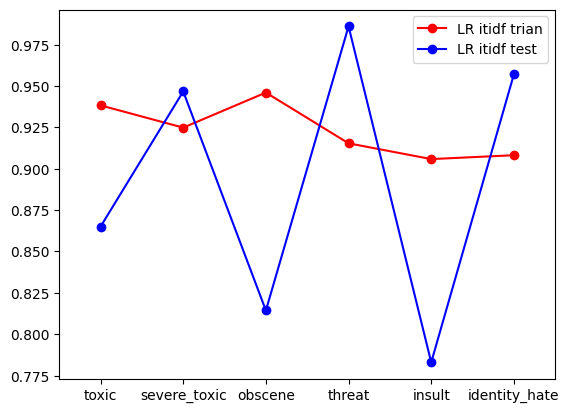

In [ ]:
classes= ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Assuming you have the data for the scores in the variables socre_svm_itidf_trian and socre_svm_itidf_test


plt.plot(classes, scores_LR_tfif_train, color='r', label='LR itidf trian', marker='o')
plt.plot(classes, scores_LR_tfif_test, color='b', label='LR itidf test', marker='o')
plt.xlim(-0.5, 5.5)  # Set the x-axis limits appropriately
plt.legend()
plt.show()

In [ ]:
train_target

9069    0
2603    0
7738    0
1579    0
5058    0
       ..
5734    0
5191    0
5390    0
860     0
7270    0
Name: identity_hate, Length: 7000, dtype: int64

In [ ]:
submission

{'toxic': array([0.61793208, 0.3085497 , 0.55980661, ..., 0.72732422, 0.54596066,
        0.26647331]),
 'severe_toxic': array([0.04938911, 0.03656802, 0.03981991, ..., 0.07605023, 0.04461038,
        0.03436669]),
 'obscene': array([0.32646443, 0.15389673, 0.25134258, ..., 0.57227644, 0.23821059,
        0.14604479]),
 'threat': array([0.01720374, 0.01506743, 0.01698875, ..., 0.01813972, 0.01671835,
        0.01560099]),
 'insult': array([0.27909928, 0.13835837, 0.22350547, ..., 0.4240725 , 0.22806382,
        0.13390883]),
 'identity_hate': array([0.0466508 , 0.03392706, 0.0396976 , ..., 0.0512836 , 0.04292349,
        0.03307253])}

# SVM

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn import svm
from sklearn.metrics import accuracy_score

socre_svm_itidf_trian=[]
socre_svm_itidf_test=[]


for class_name in class_names:
    train_target = y_train[class_name]
    test_target =y_test[class_name]
    model = svm.SVC(kernel = 'rbf', random_state = 10)
    #%%
    model.fit(df_comment_tf_idf_train,train_target)
    #%%
    y=model.predict(df_comment_tf_idf_train)
    y2=model.predict(df_comment_tf_idf_test)
    #%%

    score =accuracy_score(y, train_target)
    print(score)
    score2 =accuracy_score(y2, test_target)
    print(score2)
    socre_svm_itidf_trian.append(score)
    socre_svm_itidf_test.append(score2)
    pickle.dump(classifier,open( f'model_SVM_{class_name}.pkl',"wb"))


0.9948571428571429
0.879
0.9751428571428571
0.944
0.9817142857142858
0.8923333333333333
0.9924285714285714
0.9866666666666667
0.9741428571428571
0.8416666666666667
0.9832857142857143
0.9576666666666667


In [ ]:
socre_svm_itidf_test

[0.8763333333333333,
 0.9453333333333334,
 0.8953333333333333,
 0.983,
 0.854,
 0.961]

In [ ]:
socre_svm_itidf_trian

[0.9944285714285714,
 0.9712857142857143,
 0.9841428571428571,
 0.9915714285714285,
 0.9722857142857143,
 0.9781428571428571]

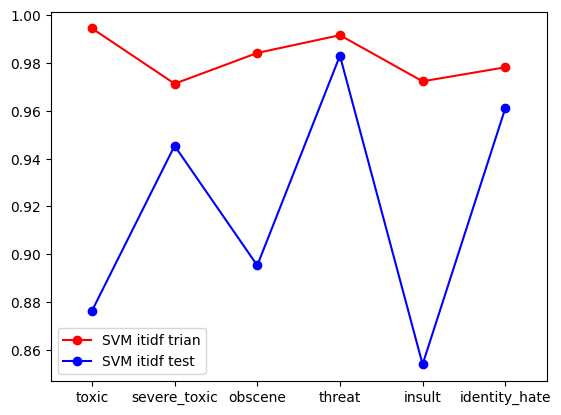

In [ ]:
# Assuming you have the data for the scores in the variables socre_svm_itidf_trian and socre_svm_itidf_test
classes= ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Assuming you have the data for the scores in the variables socre_svm_itidf_trian and socre_svm_itidf_test


plt.plot(classes, socre_svm_itidf_trian, color='r', label='SVM itidf trian', marker='o')
plt.plot(classes, socre_svm_itidf_test, color='b', label='SVM itidf test', marker='o')
plt.xlim(-0.5, 5.5)  # Set the x-axis limits appropriately
plt.legend()
plt.show()

In [ ]:
df_comment_tf_idf_train

aa  aaron  abbey  abc  abcmonster  abd  abide  abilities  ability  \
0     0.0    0.0    0.0  0.0         0.0  0.0    0.0        0.0      0.0   
1     0.0    0.0    0.0  0.0         0.0  0.0    0.0        0.0      0.0   
2     0.0    0.0    0.0  0.0         0.0  0.0    0.0        0.0      0.0   
3     0.0    0.0    0.0  0.0         0.0  0.0    0.0        0.0      0.0   
4     0.0    0.0    0.0  0.0         0.0  0.0    0.0        0.0      0.0   
...   ...    ...    ...  ...         ...  ...    ...        ...      ...   
6995  0.0    0.0    0.0  0.0         0.0  0.0    0.0        0.0      0.0   
6996  0.0    0.0    0.0  0.0         0.0  0.0    0.0        0.0      0.0   
6997  0.0    0.0    0.0  0.0         0.0  0.0    0.0        0.0      0.0   
6998  0.0    0.0    0.0  0.0         0.0  0.0    0.0        0.0      0.0   
6999  0.0    0.0    0.0  0.0         0.0  0.0    0.0        0.0      0.0   

      able  ...  zionism  zionist  zionists  zis  zod  zoey  zone  zones   zu  \
0      0.0  ...      0.0      0.0       0.0  0.0  0.0   0.0   0.0    0.0  0.0   
1      0.0  ...      0.0      0.0       0.0  0.0  0.0   0.0   0.0    0.0  0.0   
2      0.0  ...      0.0      0.0       0.0  0.0  0.0   0.0   0.0    0.0  0.0   
3      0.0  ...      0.0      0.0       0.0  0.0  0.0   0.0   0.0    0.0  0.0   
4      0.0  ...      0.0      0.0       0.0  0.0  0.0   0.0   0.0    0.0  0.0   
...    ...  ...      ...      ...       ...  ...  ...   ...   ...    ...  ...   
6995   0.0  ...      0.0      0.0       0.0  0.0  0.0   0.0   0.0    0.0  0.0   
6996   0.0  ...      0.0      0.0       0.0  0.0  0.0   0.0   0.0    0.0  0.0   
6997   0.0  ...      0.0      0.0       0.0  0.0  0.0   0.0   0.0    0.0  0.0   
6998   0.0  ...      0.0      0.0       0.0  0.0  0.0   0.0   0.0    0.0  0.0   
6999   0.0  ...      0.0      0.0       0.0  0.0  0.0   0.0   0.0    0.0  0.0   

      zuck  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0  
...    ...  
6995   0.0  
6996   0.0  
6997   0.0  
6998   0.0  
6999   0.0  

[7000 rows x 10000 columns]

In [ ]:

train_target

9069    1
2603    1
7738    0
1579    0
5058    1
       ..
5734    0
5191    1
5390    1
860     0
7270    0
Name: toxic, Length: 7000, dtype: int64

# XGBoot

In [ ]:

# First XGBoost model for Pima Indians dataset
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle
socre_XGBoot_itidf_trian=[]
socre_XGBoot_itidf_test=[]

for class_name in class_names:
    train_target = y_train[class_name]
    test_target =y_test[class_name]
    # fit model no training data
    model = XGBClassifier()
    model.fit(df_comment_tf_idf_train, train_target)
    y_pred = model.predict(df_comment_tf_idf_train)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(train_target, predictions)
    socre_XGBoot_itidf_trian.append(accuracy)
    # make predictions for test data
    y_pred = model.predict(df_comment_tf_idf_test)
    predictions = [round(value) for value in y_pred]

    # evaluate predictions
    accuracy = accuracy_score(test_target, predictions)
    socre_XGBoot_itidf_test.append(accuracy)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    pickle.dump(model,open( f'model_XGBoot_{class_name}.pkl',"wb"))

Accuracy: 86.43%
Accuracy: 94.67%
Accuracy: 90.67%
Accuracy: 98.37%
Accuracy: 85.67%
Accuracy: 95.93%


In [ ]:
y_train

toxic  severe_toxic  obscene  threat  insult  identity_hate
9069      0             0        0       0       0              0
2603      0             0        0       0       0              0
7738      1             1        1       0       1              0
1579      1             0        1       0       1              0
5058      0             0        0       0       0              0
...     ...           ...      ...     ...     ...            ...
5734      1             0        0       0       1              1
5191      0             0        0       0       0              0
5390      1             0        1       0       1              0
860       0             0        0       0       0              0
7270      0             0        0       0       0              0

[7000 rows x 6 columns]

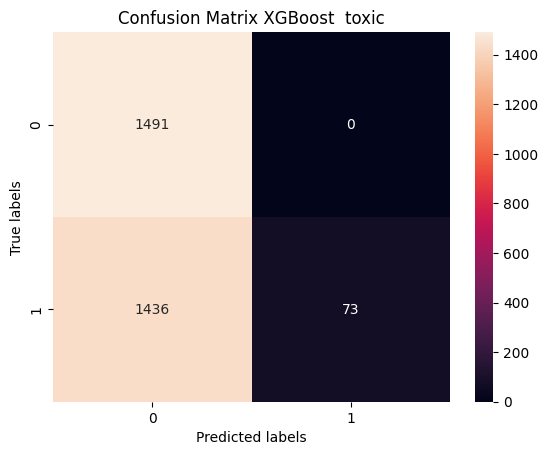

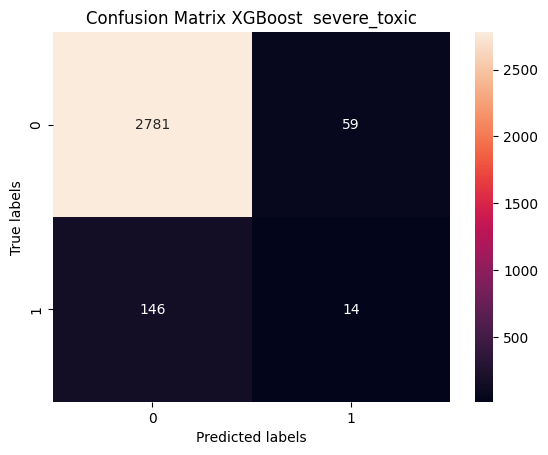

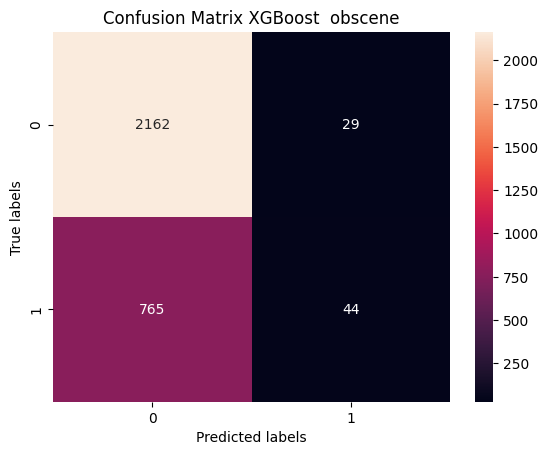

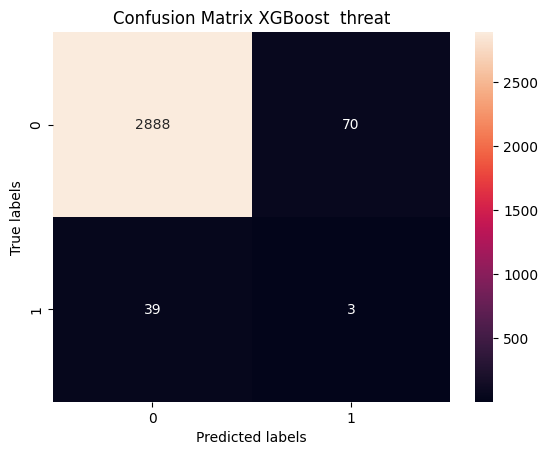

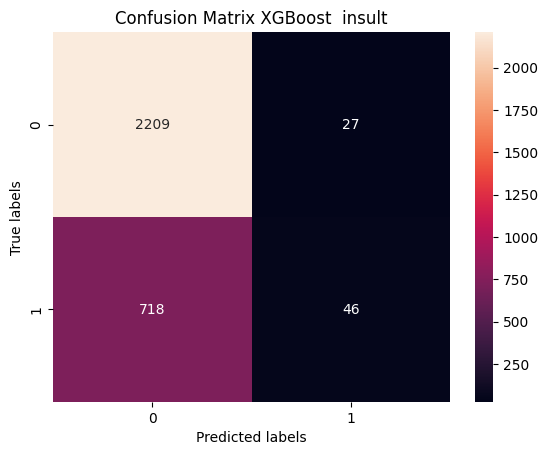

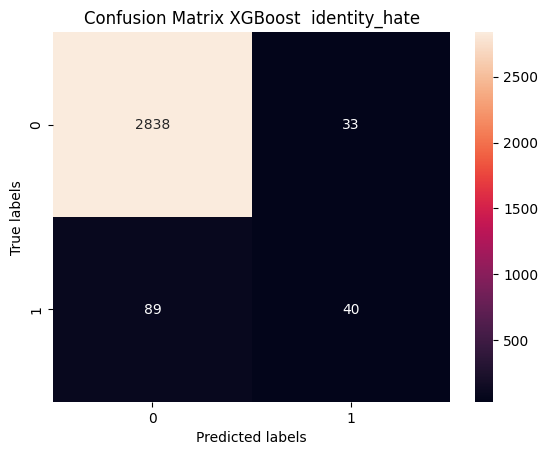

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
for class_name in class_names:
    test_target =y_test[class_name]

    y_pred = model.predict(df_comment_tf_idf_test)
    predictions = [round(value) for value in y_pred]

    cm = confusion_matrix(test_target, predictions)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
    ax.set_title(f'Confusion Matrix XGBoost  {class_name}');
    plt.show()

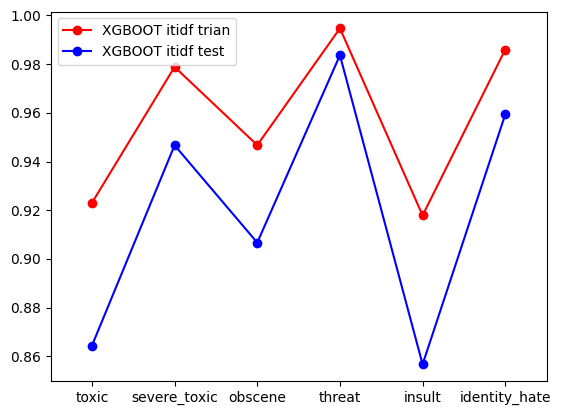

In [ ]:

plt.plot(classes, socre_XGBoot_itidf_trian, color='r', label='XGBOOT itidf trian', marker='o')
plt.plot(classes, socre_XGBoot_itidf_test, color='b', label='XGBOOT itidf test', marker='o')
plt.xlim(-0.5, 5.5)  # Set the x-axis limits appropriately
plt.legend()
plt.show()

# Clustering

In [ ]:
from sklearn.manifold import TSNE
from yellowbrick.text import TSNEVisualizer

from gensim import models
from gensim.models import Word2Vec
from gensim import corpora, models, similarities
from sklearn.decomposition import LatentDirichletAllocation

from collections import Counter
from scipy.sparse import csr_matrix
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics.cluster import v_measure_score

from gensim.models.coherencemodel import CoherenceModel
from gensim.models import CoherenceModel
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import pyLDAvis.gensim_models as genisvis
from sklearn.cluster import KMeans
from numpy import concatenate

# set of TF IDF

/usr/local/lib/python3.10/dist-packages/yellowbrick/text/tsne.py:401: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



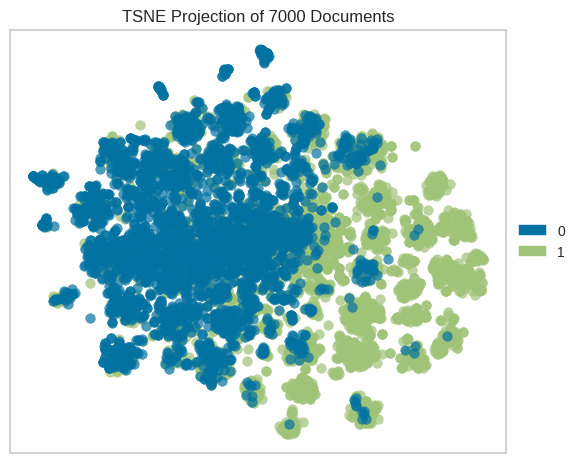

<Axes: title={'center': 'TSNE Projection of 7000 Documents'}>

In [ ]:

tsne = TSNEVisualizer()
tsne.fit(df_comment_tf_idf_train,y_train['toxic'])
tsne.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/yellowbrick/text/tsne.py:401: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



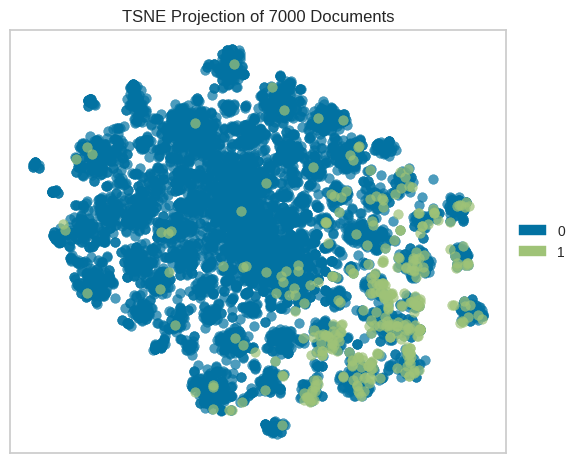

<Axes: title={'center': 'TSNE Projection of 7000 Documents'}>

In [ ]:

tsne = TSNEVisualizer()
tsne.fit(df_comment_tf_idf_train,y_train['severe_toxic'])
tsne.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/yellowbrick/text/tsne.py:401: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



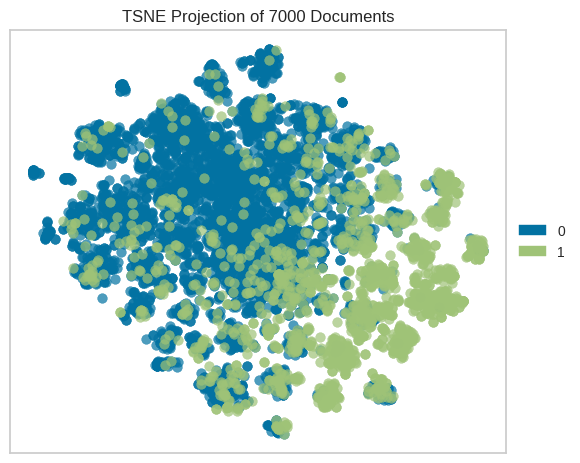

<Axes: title={'center': 'TSNE Projection of 7000 Documents'}>

In [ ]:

tsne = TSNEVisualizer()
tsne.fit(df_comment_tf_idf_train,y_train['obscene'])
tsne.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/yellowbrick/text/tsne.py:401: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



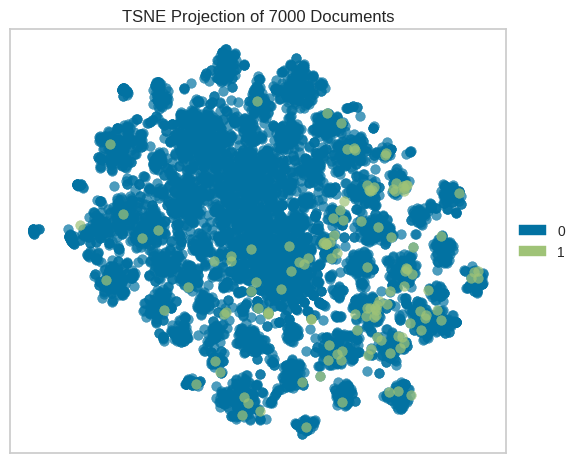

<Axes: title={'center': 'TSNE Projection of 7000 Documents'}>

In [ ]:
tsne = TSNEVisualizer()
tsne.fit(df_comment_tf_idf_train,y_train['threat'])
tsne.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/yellowbrick/text/tsne.py:401: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



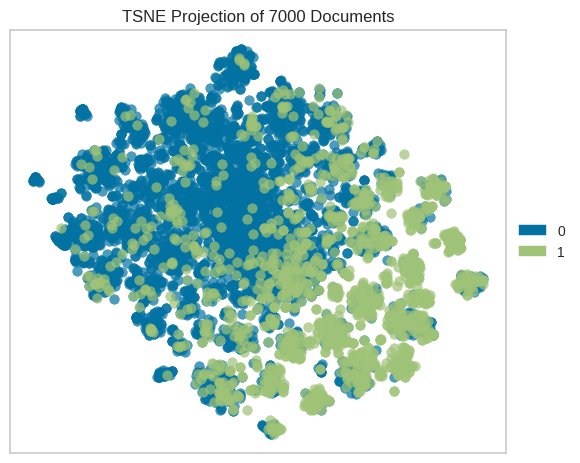

<Axes: title={'center': 'TSNE Projection of 7000 Documents'}>

In [ ]:
tsne = TSNEVisualizer()
tsne.fit(df_comment_tf_idf_train,y_train['insult'])
tsne.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/yellowbrick/text/tsne.py:401: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



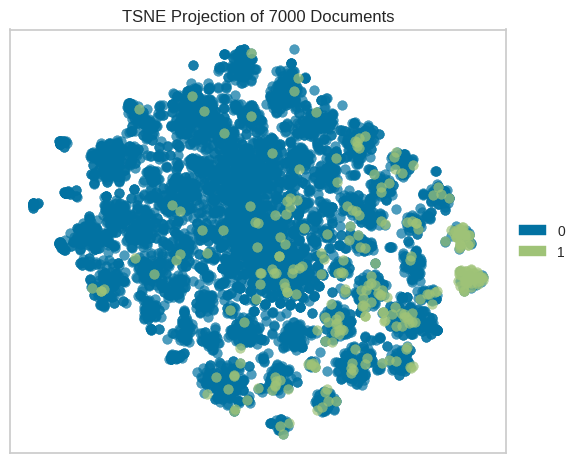

<Axes: title={'center': 'TSNE Projection of 7000 Documents'}>

In [ ]:
tsne = TSNEVisualizer()
tsne.fit(df_comment_tf_idf_train,y_train['identity_hate'])
tsne.show()

# set of Ngram

In [ ]:
#N_gram
count_vect = CountVectorizer(ngram_range=(1,2),max_features=10000)
ngram_vectors=count_vect.fit_transform(df['Cleaned_Comments'])
# if you get error in CountVectorizer' object has no attribute 'get_feature_names' ues the line with get_feature_names_out
#df_books_ngram = pd.DataFrame(ngram_vectors.toarray(),columns=count_vect.get_feature_names())
df_comment_ngram = pd.DataFrame(ngram_vectors.toarray(),columns=count_vect.get_feature_names_out())
df_comment_ngram

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



aa  aaron  abbey  abc  abd  abide  abilities  ability  able  able get  \
0      0      0      0    0    0      0          0        0     0         0   
1      0      0      0    0    0      0          0        0     0         0   
2      0      0      0    0    0      0          0        0     0         0   
3      0      0      0    0    0      0          0        0     0         0   
4      0      0      0    0    0      0          0        0     0         0   
...   ..    ...    ...  ...  ...    ...        ...      ...   ...       ...   
9995   0      0      0    0    0      0          0        0     0         0   
9996   0      0      0    0    0      0          0        0     0         0   
9997   0      0      0    0    0      0          0        0     0         0   
9998   0      0      0    0    0      0          0        0     0         0   
9999   0      0      0    0    0      0          0        0     0         0   

      ...  youve  yue  yugoslav  yugoslavia  yup  zagreb  zealand  zero  \
0     ...      0    0         0           0    0       0        0     0   
1     ...      0    0         0           0    0       0        0     0   
2     ...      0    0         0           0    0       0        0     0   
3     ...      0    0         0           0    0       0        0     0   
4     ...      0    0         0           0    0       0        0     0   
...   ...    ...  ...       ...         ...  ...     ...      ...   ...   
9995  ...      0    0         0           0    0       0        0     0   
9996  ...      0    0         0           0    0       0        0     0   
9997  ...      0    0         0           0    0       0        0     0   
9998  ...      0    0         0           0    0       0        0     0   
9999  ...      0    0         0           0    0       0        0     0   

      zionist  zuck  
0           0     0  
1           0     0  
2           0     0  
3           0     0  
4           0     0  
...       ...   ...  
9995        0     0  
9996        0     0  
9997        0     0  
9998        0     0  
9999        0     0  

[10000 rows x 10000 columns]

In [ ]:
['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/yellowbrick/text/tsne.py:401: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



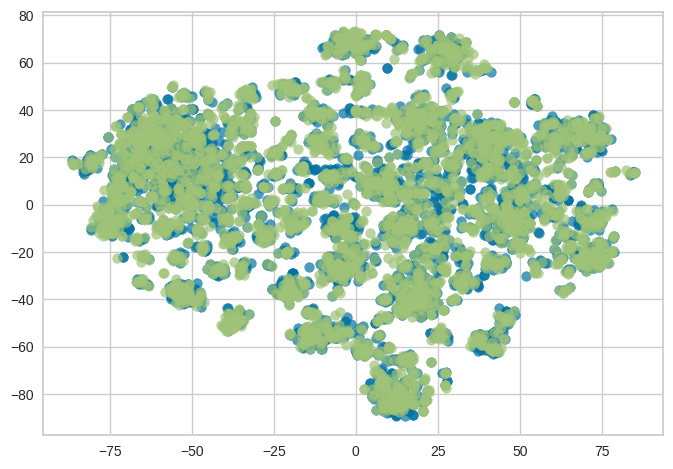

In [ ]:

tsne = TSNEVisualizer()
tsne.fit(df_comment_ngram,y_train['toxic'])
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/yellowbrick/text/tsne.py:401: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



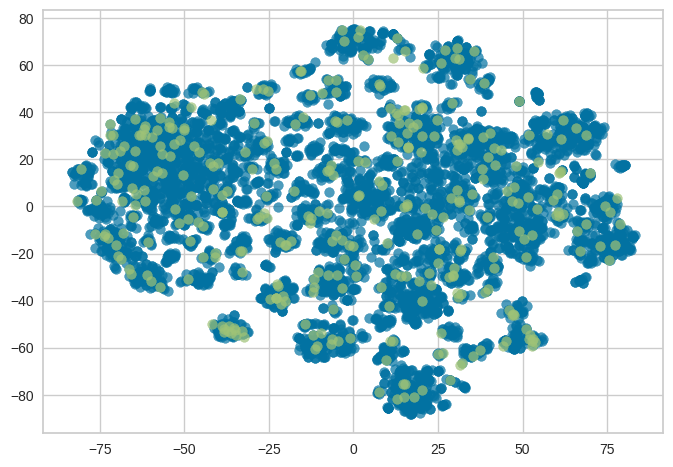

In [ ]:

tsne = TSNEVisualizer()
tsne.fit(df_comment_ngram,y_train['severe_toxic'])
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/yellowbrick/text/tsne.py:401: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



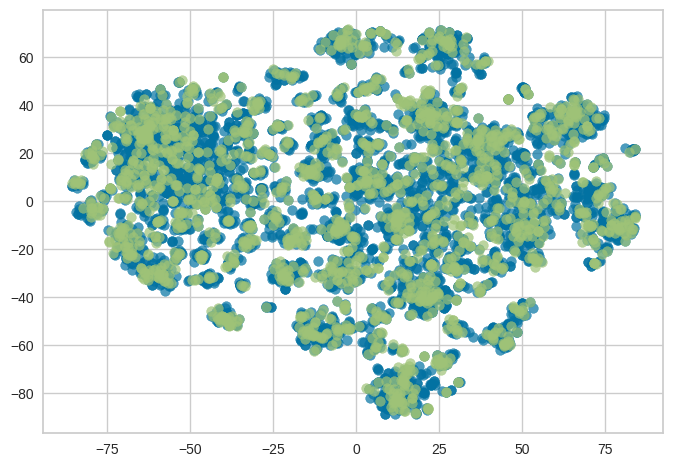

In [ ]:

tsne = TSNEVisualizer()
tsne.fit(df_comment_ngram,y_train['obscene'])
plt.show()

In [ ]:

tsne = TSNEVisualizer()
tsne.fit(df_comment_ngram,y_train['threat'])
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:

tsne = TSNEVisualizer()
tsne.fit(df_comment_ngram,y_train['insult'])
plt.show()

In [ ]:

tsne = TSNEVisualizer()
tsne.fit(df_comment_ngram,y_train['identity_hate'])
plt.show()

In [ ]:
# create a dictionary of the book words
import gensim

wordsDictionary = corpora.Dictionary(df['Cleaned_Comments'].str.split())
corpus = [wordsDictionary.doc2bow(wordDic) for wordDic in df['Cleaned_Comments'].str.split()]


LDAModel = gensim.models.ldamodel.LdaModel(corpus = corpus,
                                           id2word = wordsDictionary,
                                           num_topics = 5,
                                           random_state = 42,
                                           update_every = 1,
                                           chunksize = 100,
                                           passes = 10,
                                           alpha = 'auto',
                                           per_word_topics = True)
PredictedWords = LDAModel.inference(corpus)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
import gensim
import pyLDAvis
pyLDAvis.enable_notebook()
visualization = genisvis.prepare(LDAModel, corpus, wordsDictionary)
visualization

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.332418  0.152637       1        1  42.707825
0     -0.086829 -0.319765       2        1  23.954718
1      0.132729  0.078111       3        1  14.833923
4      0.140391  0.069929       4        1  10.408228
2      0.146127  0.019088       5        1   8.095306, topic_info=           Term         Freq        Total Category  logprob  loglift
158        fuck   817.000000   817.000000  Default  30.0000  30.0000
118   wikipedia  2033.000000  2033.000000  Default  29.0000  29.0000
470     article  2011.000000  2011.000000  Default  28.0000  28.0000
120        like  1334.000000  1334.000000  Default  27.0000  27.0000
154        page  1926.000000  1926.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
4565      gonna    67.885187    68.675686   Topic5  -5.6455   2.5023
2207     fuckin    66.720897    67.501904   Topic5  -5.6628   2.5022
1581      learn    68.332452    69.132864   Topic5  -5.6390   2.5022
1282        bot    70.127306    70.951579   Topic5  -5.6130   2.5022
8349      brown    68.232794    69.125493   Topic5  -5.6404   2.5009

[203 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1234      4  0.995696   adding
162       1  0.999168     also
571       2  0.995233  another
19        2  0.994916   around
470       1  0.999863  article
...     ...       ...      ...
430       2  0.998190    wrong
1530      5  0.993526     yeah
1734      1  0.046682     year
1734      2  0.951586     year
1208      3  0.998809    years

[192 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 2, 5, 3])

In [ ]:
def TSNEData(data):
  Tsna = TSNE(n_components= 2, random_state= 42)
  DataOfTSNE = Tsna.fit_transform(data)
  return DataOfTSNE

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
DataOfBOW = TSNEData(df_comment_BOW)
DataOfTFIDF = TSNEData( df_comment_tf_idf_train)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# function to visualize the five clusters
def Visualize_Clusters(ClusteringModel, result, Y_Prediction,n, em=True,title=''):
    # get centroids of kmeans cluster
    if em:
        centroids = np.empty(shape=(ClusteringModel.n_components, result.shape[1]))
    else:
        centroids = ClusteringModel.cluster_centers_

  # we want to transform the rows and the centroids
  # todense return matrix
    matrix_data = csr_matrix(result)
    all_Data = concatenate((matrix_data.todense(), centroids))


    n_clusters = n


    plt.scatter([all_Data[:-n_clusters, 0]], [all_Data[:-n_clusters, 1]], c=Y_Prediction, cmap=plt.cm.Paired, marker= 'x')
    plt.scatter([all_Data[-n_clusters:, 0]], [all_Data[-n_clusters:, 1]], marker= 'o')

    # Set the x-axis label
    plt.xlabel('X-Label')
    # Set the y-axis label
    plt.ylabel('Y-Label')
    # Set the title
    plt.title(title)
    plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# function to apply kmeans algorithm
def KMeansAlgorithm(clusters, X_data):
    kmeans = KMeans(n_clusters=clusters, random_state=42)
    Y_Prediction = kmeans.fit_predict(X_data)
    return kmeans, Y_Prediction

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# function to display histogram of each cluster
def Clusters_Count(predictedClusters,title=''):
    clustersNumber = Counter(predictedClusters)
    plt.bar(clustersNumber.keys(), clustersNumber.values())
    plt.xlabel('Cluster Number')
    plt.ylabel('Count')
    # Set the title
    plt.title(title)
    plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 2, silhouette score is 0.3350600600242615)


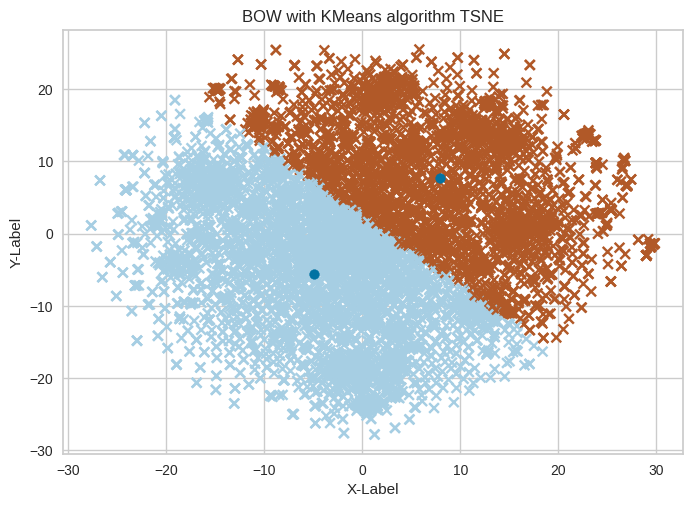

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 3, silhouette score is 0.3605823516845703)


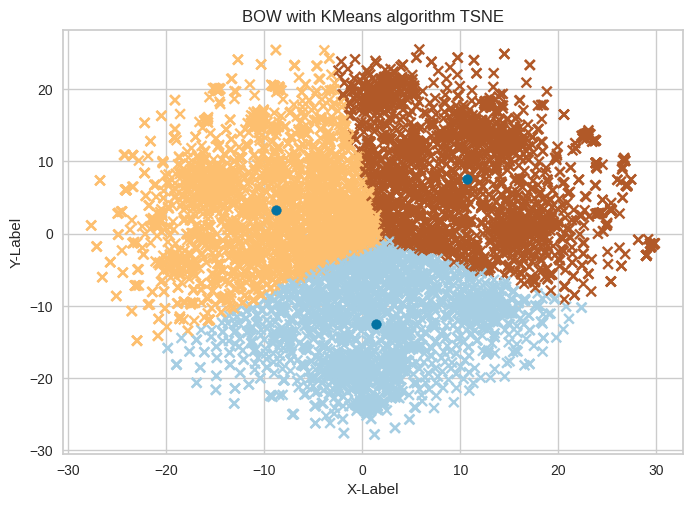

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 4, silhouette score is 0.35509535670280457)


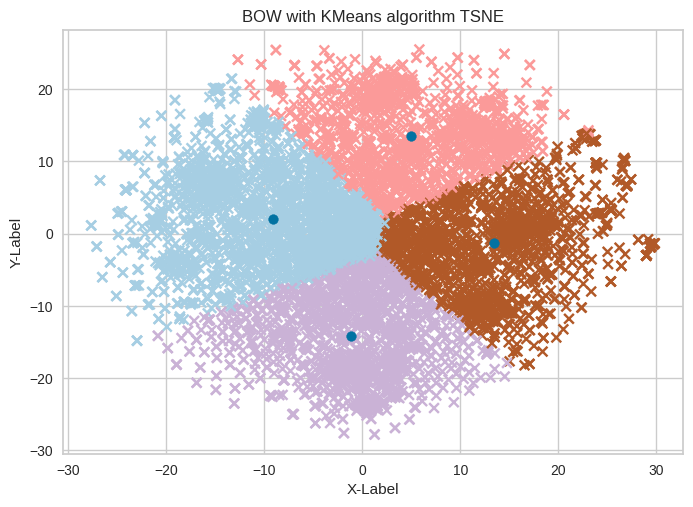

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 5, silhouette score is 0.36887499690055847)


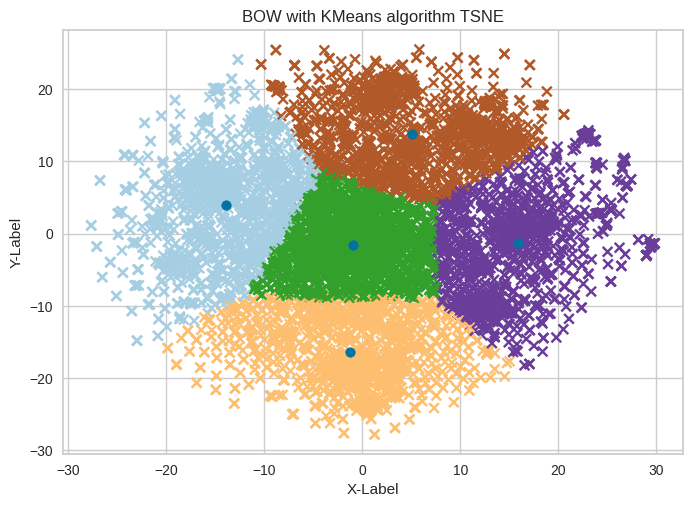

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 6, silhouette score is 0.38029298186302185)


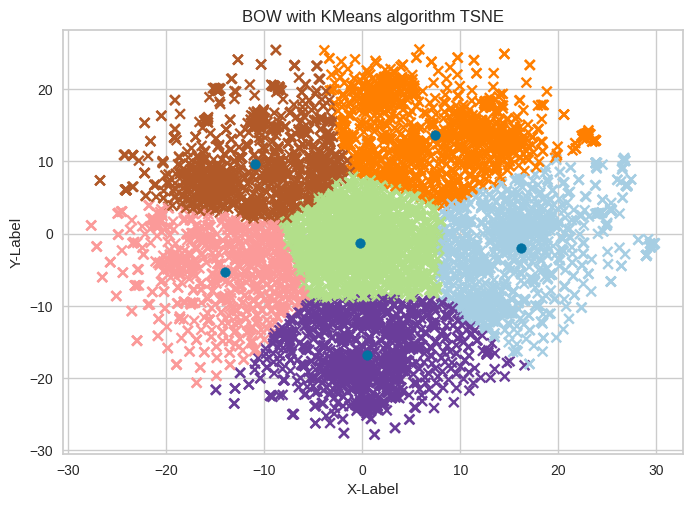

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 7, silhouette score is 0.369767427444458)


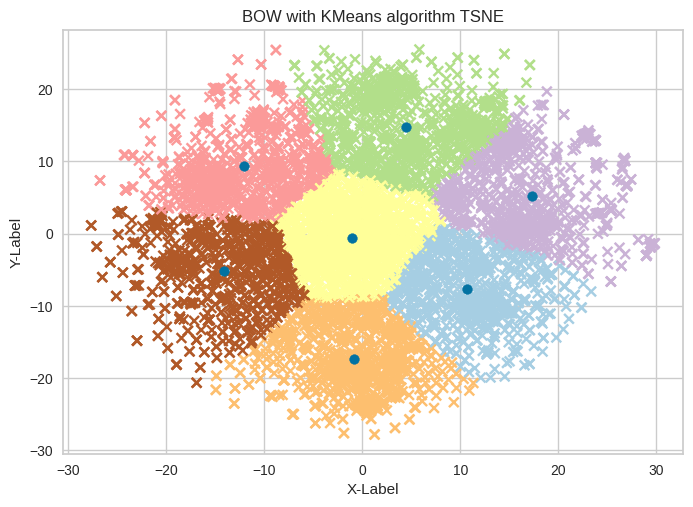

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 8, silhouette score is 0.37594035267829895)


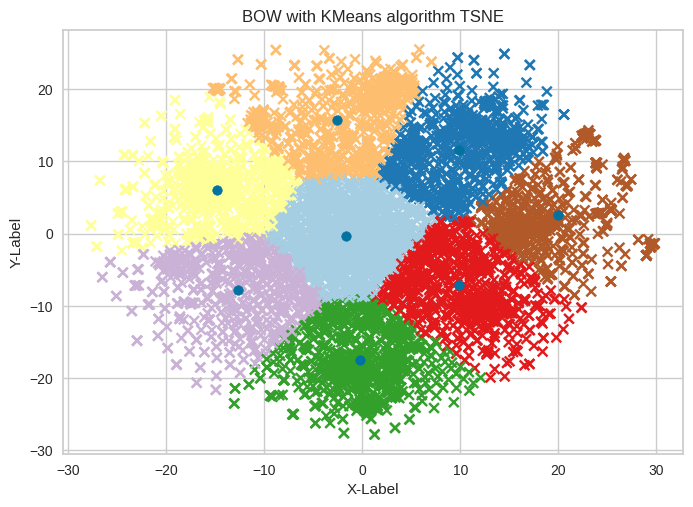

In [ ]:
# Bow with KMeans algorithm
silhouette_score_BOW=[]
for i in range (2,9):
  KMeansWithBOW, KMeansWithBOWPrediction = KMeansAlgorithm(i,DataOfBOW)
  score = silhouette_score(DataOfBOW, KMeansWithBOWPrediction)
  print("For n_clusters = {}, silhouette score is {})".format(i, score))
  silhouette_score_BOW.append(score)
  # visualize clusters
  Visualize_Clusters(KMeansWithBOW, DataOfBOW, KMeansWithBOWPrediction,i,False,title='BOW with KMeans algorithm TSNE',)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



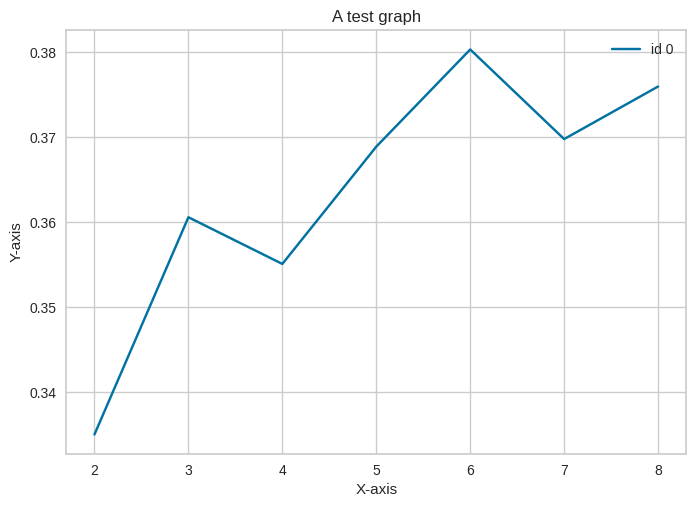

In [ ]:
import matplotlib.pyplot as plt
x = range (2,9)
y = silhouette_score_BOW
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("A test graph")
plt.plot(x,y,label = 'id %s'%i)
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 2, silhouette score is 0.3019334673881531)


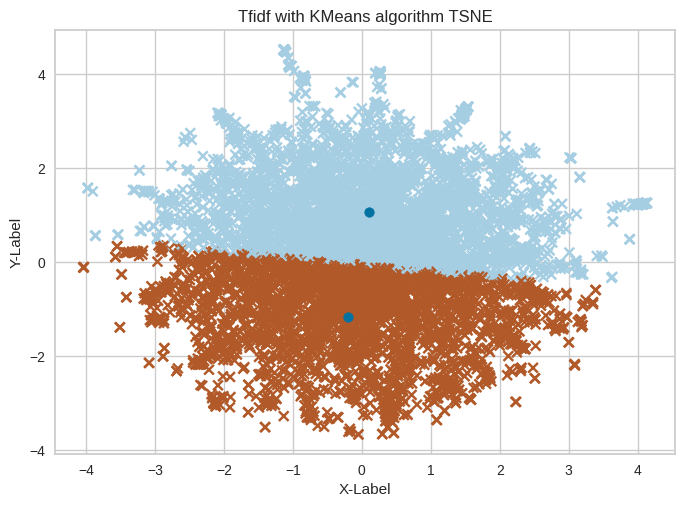

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 3, silhouette score is 0.3048259913921356)


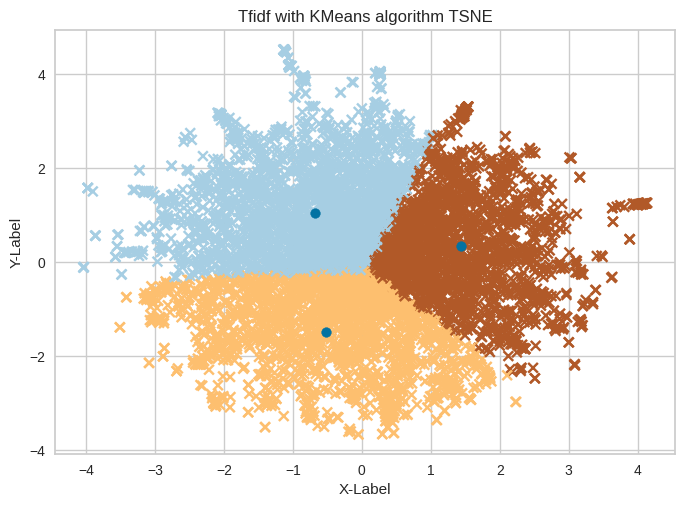

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 4, silhouette score is 0.31592249870300293)


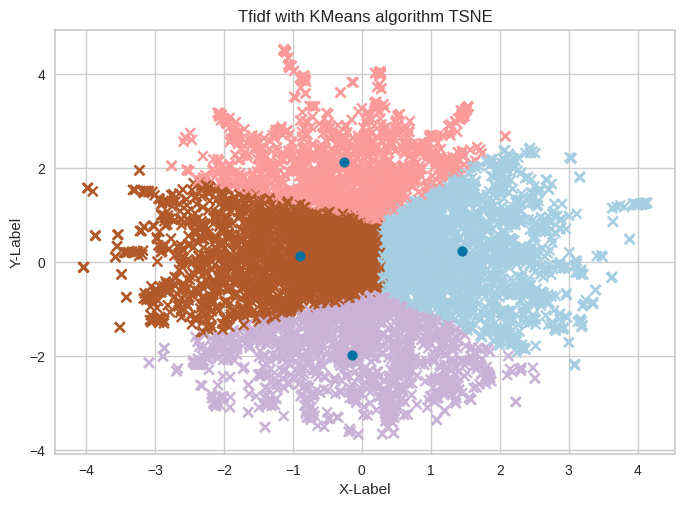

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 5, silhouette score is 0.3571380376815796)


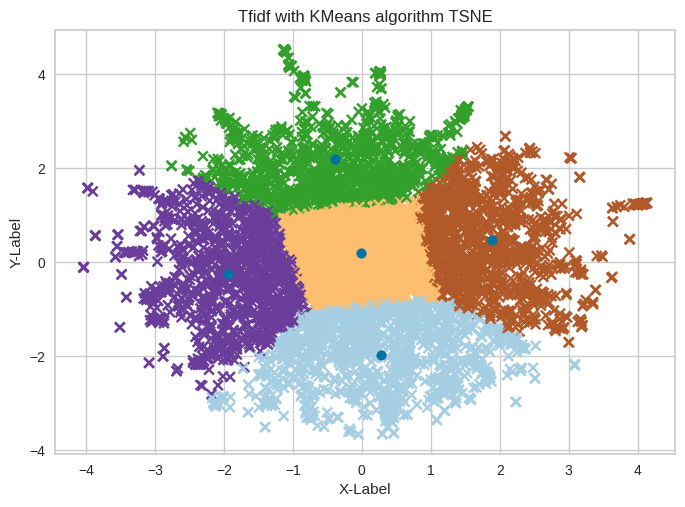

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 6, silhouette score is 0.3681832551956177)


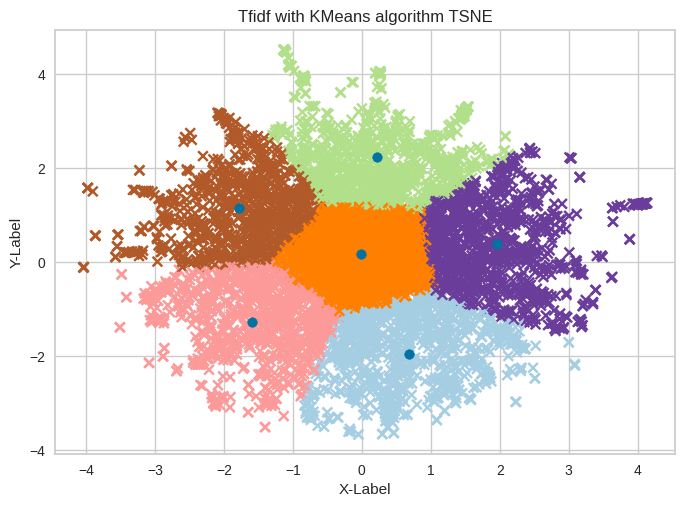

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 7, silhouette score is 0.36671972274780273)


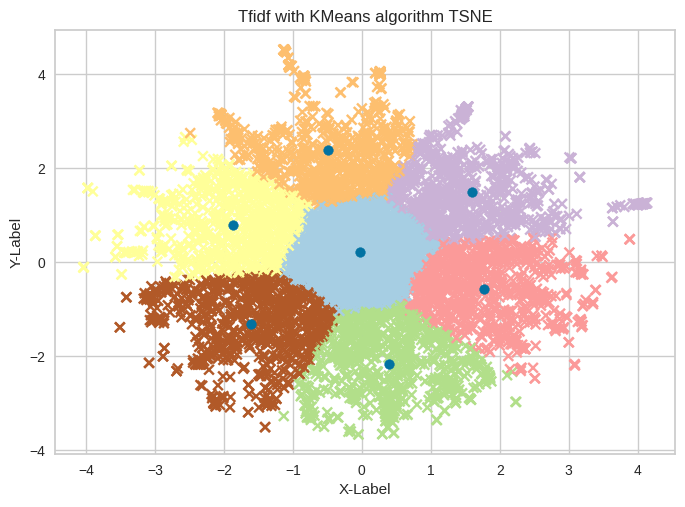

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 8, silhouette score is 0.3293836712837219)


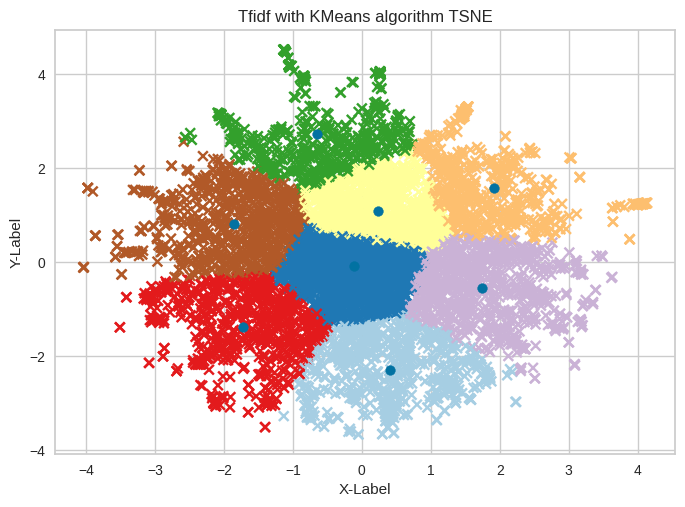

In [ ]:
# TFIDF with KMeans algorithm
silhouette_score_BOW=[]
for i in range (2,9):
  KMeansWithBOW, KMeansWithBOWPrediction = KMeansAlgorithm(i,DataOfTFIDF)
  score = silhouette_score(DataOfTFIDF, KMeansWithBOWPrediction)
  print("For n_clusters = {}, silhouette score is {})".format(i, score))
  silhouette_score_BOW.append(score)
  # visualize clusters
  Visualize_Clusters(KMeansWithBOW, DataOfTFIDF, KMeansWithBOWPrediction,i,False,title='Tfidf with KMeans algorithm TSNE',)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



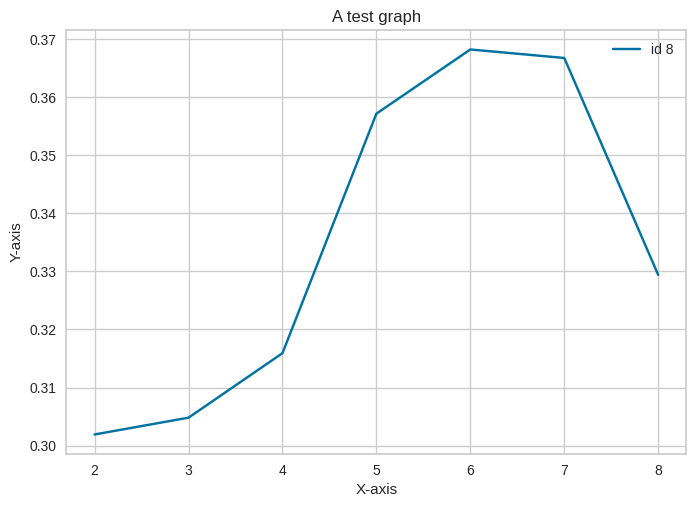

In [ ]:
import matplotlib.pyplot as plt
x = range (2,9)
y = silhouette_score_BOW
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("A test graph")
plt.plot(x,y,label = 'id %s'%i)
plt.legend()
plt.show()

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from scipy.cluster.hierarchy import dendrogram


clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(DataOfTFIDF)

AgglomerativeClustering()
clustering.labels_



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



array([6595, 3765, 6999, ...,    3,    1,    0])

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from scipy.cluster.hierarchy import dendrogram


clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(DataOfBOW)

AgglomerativeClustering()
clustering.labels_


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



array([4935, 4624, 6999, ...,    5,    2,    0])